# Use Convolutional Neural Network to Identify Spiral Arms
Model 3: throwing a few real high-z galaxies into the training set ....

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing
### Preprocessing the Training set

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('dataset/training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 20020 images belonging to 2 classes.


### Preprocessing the Test set

In [3]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6132 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[100, 100, 3]))

### Step 2 - Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [11]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [12]:
import time

In [13]:
t1 = time.time()
cnn.fit(x = training_set, validation_data = test_set, epochs = 30)
t2 = time.time()
print('CNN running time is {:.2f}mins'.format((t2 - t1)/60))

Epoch 1/30
626/626 [==============================] - 168s 267ms/step - loss: 0.6389 - accuracy: 0.6297 - val_loss: 0.5818 - val_accuracy: 0.6977
Epoch 2/30
626/626 [==============================] - 166s 265ms/step - loss: 0.5863 - accuracy: 0.6943 - val_loss: 0.5691 - val_accuracy: 0.7055
Epoch 3/30
626/626 [==============================] - 161s 257ms/step - loss: 0.5664 - accuracy: 0.7071 - val_loss: 0.5551 - val_accuracy: 0.7153
Epoch 4/30
626/626 [==============================] - 140s 224ms/step - loss: 0.5527 - accuracy: 0.7119 - val_loss: 0.5354 - val_accuracy: 0.7322
Epoch 5/30
626/626 [==============================] - 139s 222ms/step - loss: 0.5319 - accuracy: 0.7323 - val_loss: 0.5219 - val_accuracy: 0.7428
Epoch 6/30
626/626 [==============================] - 138s 220ms/step - loss: 0.5193 - accuracy: 0.7433 - val_loss: 0.5198 - val_accuracy: 0.7422
Epoch 7/30
626/626 [==============================] - 141s 225ms/step - loss: 0.5039 - accuracy: 0.7555 - val_loss: 0.5265 -

## Part 4 - Testing the CNN's performance on new dataset

### Here is a visual representation of the training samples:
<div>
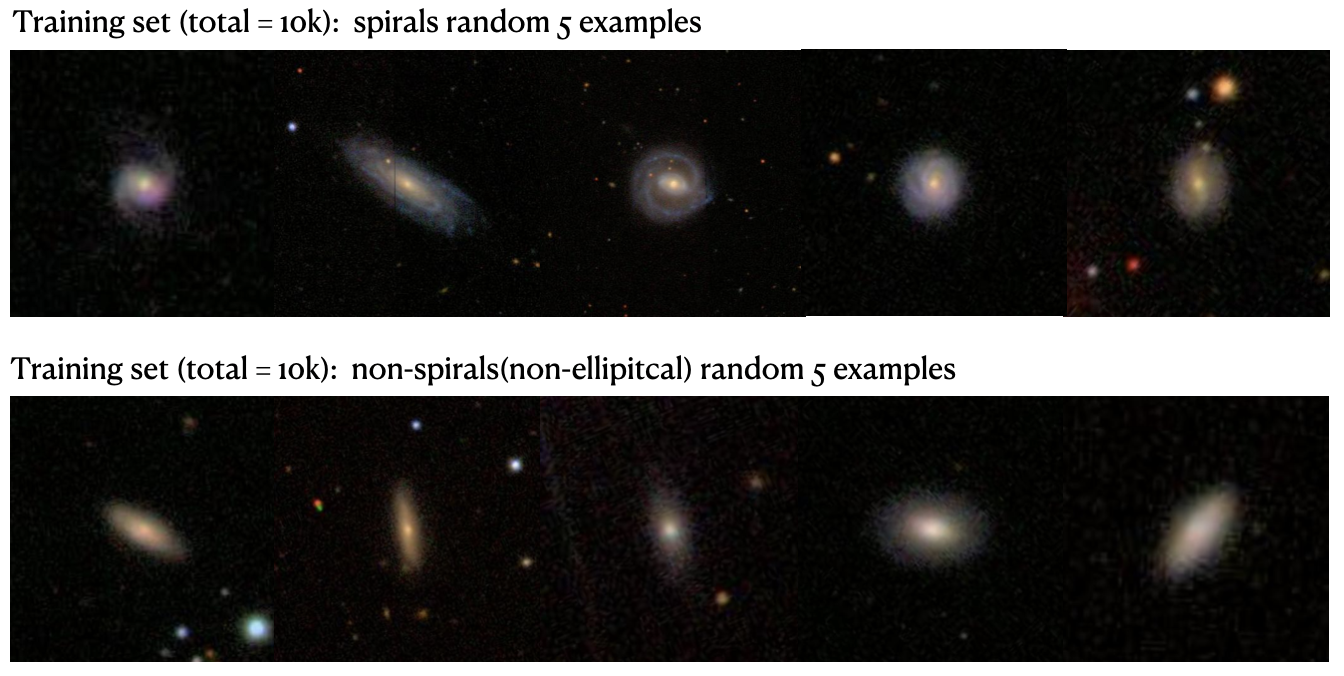
</div>


### We are going to have fun with predicting  
1. A very well-known nearby large spiral galaxy with beautiful rgb color. 
2. A nearby spiral galaxy from a single-band color.
3. An ancient spiral galaxy (2.6 years after the Big Bang) that is gravitationally lensed.
4. A very distant 'cosmic ring of fire' galaxy
5. A clumpy high-z galaxy

In [14]:
# check which label is which
training_set.class_indices

{'nonspirals': 0, 'spirals': 1}

In [15]:
from keras.preprocessing import image
def image_in(fileloc, dimx=100, dimy=100):
    """ reshape a raw jpg image into an array that is acceptable by keras models.
    Parameters
    ----------
    fileloc : path and name for the input image
        an input directory under which files are searched.
    dimx, dimy : int
        should be the same as the target_size in the trained CNN
    ----------
    Return
    test_image that can be processed by kera models 
    """
    test_image = image.load_img(fileloc, target_size = (dimx, dimy))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    return test_image

### Prediction 1. [successful on a higher-resolution color image]
This is a beautiful nearby spiral galaxy M101. The image is much large and has more details than the training set. 
Would CNN be able to recognise it as as spiral galaxy ?  Let's see.
<div>
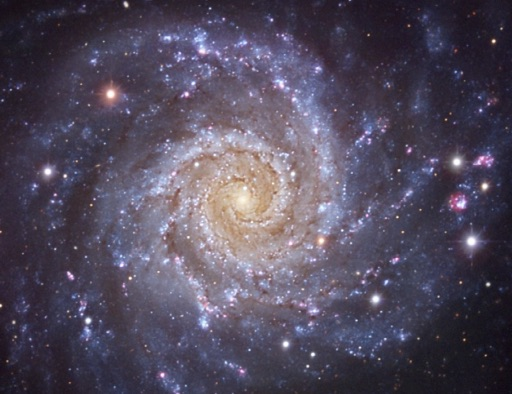
</div>


In [16]:
import numpy as np
fileloc = 'dataset/single_prediction_test/nearby_large.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print('The predicted label is ', result)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

The predicted label is  [[1.]]
CNN predicts that the image above is  a spiral galaxy


### Prediction 2.  [successful on single-color image]
This is also a nearby spiral galaxy. The image is taken using only one filter,  i.e., a single color image.
Would CNN trained on 3-color images be able to recognise it as as spiral galaxy ?  Let's see.

<div>
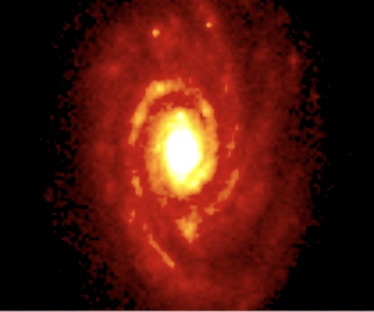
</div>


In [17]:
fileloc = 'dataset/single_prediction_test/spiral_singleband.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print(result)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

[[1.]]
CNN predicts that the image above is  a spiral galaxy


### Prediction 3.  [Failed on a gravitationally lensed distant spiral image]

This is an ancient spiral galaxy that I studied. Would the CNN trained using 
nearby spiral galaxies be able to identify such a proto-type spiral galaxy ? 
https://en.wikipedia.org/wiki/A1689B11

<div>
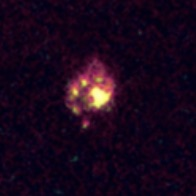
</div>


In [18]:
fileloc = 'dataset/single_prediction_test/ancient_spiral_A1689B11.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

print(result)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

[[0.]]
CNN predicts that the image above is  not a spiral galaxy


### Prediction 4:  What about a weird type ? Spiral or non-Spiral ?
This is the cosmic 'ring of fire' galaxy that I discovered. 
https://astronomycommunity.nature.com/posts/a-distant-giant-with-a-ring-on-it

Would the CNN trained using nearby spiral galaxies classify such a ring galaxy as 'spiral' or 'nonspiral'?  I am curious.  Let's see! 
<div>
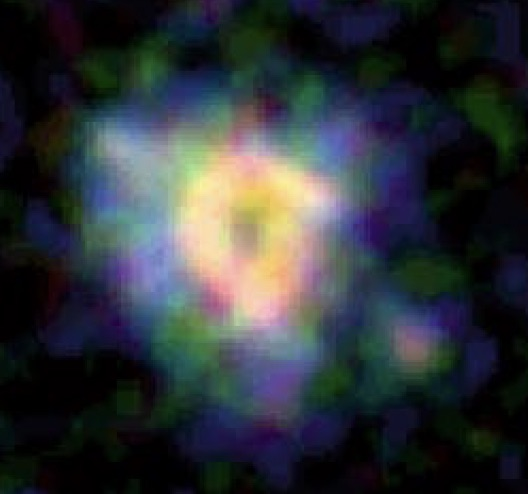
</div>



In [19]:
fileloc = 'dataset/single_prediction_test/cosmic_ring_of_fire.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

CNN predicts that the image above is  a spiral galaxy


### Prediction 5:  What about some clumpy high-redshift galaxies like these ? 
[Successfully predict that they are not spirls]
Images from the CANDELS survey:
<div>
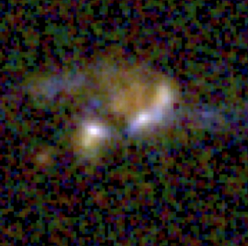
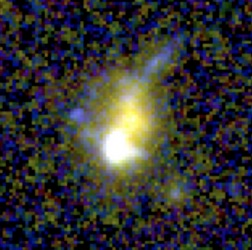
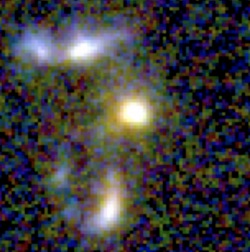
</div>


In [20]:
fileloc = 'dataset/single_prediction_test/clumpy1.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)  

fileloc = 'dataset/single_prediction_test/clumpy2.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

fileloc = 'dataset/single_prediction_test/clumpy3.jpg'
image_pred = image_in(fileloc)
result = cnn.predict(image_pred)

if result[0][0] == 1:
    prediction = 'a spiral galaxy'
else:
    prediction = 'not a spiral galaxy'
    
print('CNN predicts that the image above is ', prediction)   

CNN predicts that the image above is  not a spiral galaxy
CNN predicts that the image above is  not a spiral galaxy
CNN predicts that the image above is  not a spiral galaxy


### Conclusion: 
0. This model (3) performs the best so far
1. This model only fails on a gravationationlly lensed spiral (we will try again using source-reconstructed image)

The next step is to train a 4th model (cnn_spiral_model4) using 3 categories, spiral, nonspiral (non elliptical) and elliptical.

In [21]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
cnn.save('saved_model/cnn_spiral_modelv3')

INFO:tensorflow:Assets written to: saved_model/cnn_spiral_modelv3/assets


In [22]:
cnn.save('saved_model/cnn_spiral_modelv3.h5')